In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/r4/qqn8tv4d7g18t_5fsxt6y1340000gn/T/ipykernel_37500/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [58]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

fpath = Path(mpl.get_data_path(), "fonts/ttf/NotoSansSC-Regular.ttf")

def plot_count_vs_sentiment(term):
    """The term in question must already have had a frequency count and sentiment analysis run and stored"""

    # read in results
    frequency_df = pd.read_csv(f"./frequency_counts/{term}_quarter_counts.csv")
    sentiment_df = pd.read_csv(f"./quarter_sentiments/{term}_quarter_sentiments.csv")

    combined_df = pd.merge(frequency_df, sentiment_df, on="year_quarter")

    fig, ax1 = plt.subplots()

    xvals = list(combined_df["year_quarter"])[:-1]
    # get the lists we need, and take of the last value (incomplete Q1 of 2024)
    y1 = list(combined_df["count"])[:-1]
    y2 = list(combined_df["positive"])[:-1]
    y3 = list(combined_df["negative"])[:-1]

    # count y-axis
    ax1_color = "tab:blue"
    ax1.plot(xvals, y1, color=ax1_color)
    ax1.set_ylabel("Count", color=ax1_color)
    ax1.set_ylim([0, None])

    # sentiment y-axis
    ax2 = ax1.twinx()
    # positive sentiment
    ax2.plot(xvals, y2, label="Positive Sent.", color="tab:green")
    # negative sentiment
    ax2.plot(xvals, y3, label="Negative Sent.", color="tab:red")
    ax2.set_ylabel("Sentiment")
    ax2.legend()
    ax2.set_ylim([0, 1])

    # common x axis
    ax1.set_xlabel("Quarter")
    ax1.tick_params(axis='x', rotation=50)
    ax1.set_title(f"Sentiment and Frequency of {term} over Time", font=fpath)
    ax1.tick_params(axis='x', rotation=50)
    ax1.grid()
    plt.show()



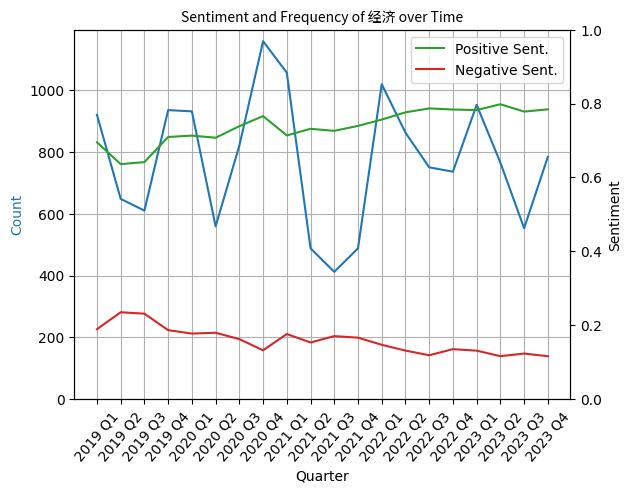

In [59]:
plot_count_vs_sentiment("经济")

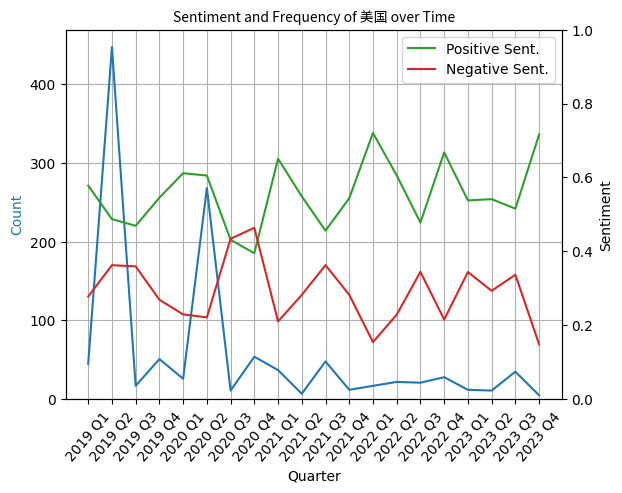

In [60]:
plot_count_vs_sentiment("美国")